In [1]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
rt_iot2022 = fetch_ucirepo(id=942) 
  
# data (as pandas dataframes) 
X = rt_iot2022.data.features 
y = rt_iot2022.data.targets
  
# metadata 
# print(rt_iot2022.metadata) 
  
# # variable information 
# print(rt_iot2022.variables) 

In [2]:
# Garbage Collector
import gc 

import pandas as pd
import numpy as np
import os

# Time Modules
import calendar
import time
import datetime
from datetime import datetime, timedelta

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


# Plots
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.subplots as sp
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(18, 12)})
%matplotlib inline

# Statistics 
from scipy.stats import norm
from scipy.stats import zscore
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [3]:
"""The RT-IoT2022, a proprietary dataset derived from a real-time IoT infrastructure, is introduced as a comprehensive resource integrating a diverse range of IoT devices and sophisticated network attack methodologies. This dataset encompasses both normal and adversarial network behaviours, providing a general representation of real-world scenarios. Incorporating data from IoT devices such as ThingSpeak-LED, Wipro-Bulb, and MQTT-Temp, as well as simulated attack scenarios involving Brute-Force SSH attacks, DDoS attacks using Hping and Slowloris, and Nmap patterns, RT-IoT2022 offers a detailed perspective on the complex nature of network traffic. The bidirectional attributes of network traffic are meticulously captured using the Zeek network monitoring tool and the Flowmeter plugin. Researchers can leverage the RT-IoT2022 dataset to advance the capabilities of Intrusion Detection Systems (IDS), fostering the development of robust and adaptive security solutions for real-time IoT networks."""

'The RT-IoT2022, a proprietary dataset derived from a real-time IoT infrastructure, is introduced as a comprehensive resource integrating a diverse range of IoT devices and sophisticated network attack methodologies. This dataset encompasses both normal and adversarial network behaviours, providing a general representation of real-world scenarios. Incorporating data from IoT devices such as ThingSpeak-LED, Wipro-Bulb, and MQTT-Temp, as well as simulated attack scenarios involving Brute-Force SSH attacks, DDoS attacks using Hping and Slowloris, and Nmap patterns, RT-IoT2022 offers a detailed perspective on the complex nature of network traffic. The bidirectional attributes of network traffic are meticulously captured using the Zeek network monitoring tool and the Flowmeter plugin. Researchers can leverage the RT-IoT2022 dataset to advance the capabilities of Intrusion Detection Systems (IDS), fostering the development of robust and adaptive security solutions for real-time IoT networks.

In [4]:
X.head(5)

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,fwd_header_size_max,bwd_header_size_tot,bwd_header_size_min,bwd_header_size_max,flow_FIN_flag_count,flow_SYN_flag_count,flow_RST_flag_count,fwd_PSH_flag_count,bwd_PSH_flag_count,flow_ACK_flag_count,fwd_URG_flag_count,bwd_URG_flag_count,flow_CWR_flag_count,flow_ECE_flag_count,fwd_pkts_payload.min,fwd_pkts_payload.max,fwd_pkts_payload.tot,fwd_pkts_payload.avg,fwd_pkts_payload.std,bwd_pkts_payload.min,bwd_pkts_payload.max,bwd_pkts_payload.tot,bwd_pkts_payload.avg,bwd_pkts_payload.std,flow_pkts_payload.min,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_iat.min,fwd_iat.max,fwd_iat.tot,fwd_iat.avg,fwd_iat.std,bwd_iat.min,bwd_iat.max,bwd_iat.tot,bwd_iat.avg,bwd_iat.std,flow_iat.min,flow_iat.max,flow_iat.tot,flow_iat.avg,flow_iat.std,payload_bytes_per_second,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,fwd_bulk_bytes,bwd_bulk_bytes,fwd_bulk_packets,bwd_bulk_packets,fwd_bulk_rate,bwd_bulk_rate,active.min,active.max,active.tot,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,0.281148,0.156193,0.437341,0.555556,296,32,40,168,32,40,0,2,1,3,3,13,0,0,0,0,0,33,76,8.444444,13.115936,0,23,32,6.4,9.555103,0,33,108,7.714286,11.618477,761.985779,29729182.96,32011597.87,4001449.734,10403073.63,4438.877106,1511693.954,2.026391e+06,506597.757339,680406.147100,761.985779,29729182.96,32011597.87,2.462431e+06,8.199747e+06,3.373777,3.0,1.666667,25.333333,10.666667,0.0,0.0,0.0,0.0,0.0,0.0,2282414.913,2282414.913,2282414.913,2282414.913,0.0,29729182.96,29729182.96,29729182.96,29729182.96,0.0,64240,26847,502
1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,0.282277,0.156821,0.439097,0.555556,296,32,40,168,32,40,0,2,1,3,3,13,0,0,0,0,0,33,76,8.444444,13.115936,0,23,32,6.4,9.555103,0,33,108,7.714286,11.618477,247.001648,29855277.06,31883584.02,3985448.003,10463455.56,4214.048386,1576435.804,1.876261e+06,469065.249000,741351.686200,247.001648,29855277.06,31883584.02,2.452583e+06,8.242459e+06,3.387323,3.0,1.666667,25.333333,10.666667,0.0,0.0,0.0,0.0,0.0,0.0,2028306.961,2028306.961,2028306.961,2028306.961,0.0,29855277.06,29855277.06,29855277.06,29855277.06,0.0,64240,26847,502
2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,0.280164,0.155647,0.435811,0.555556,296,32,40,168,32,40,0,2,1,3,3,13,0,0,0,0,0,33,74,8.222222,12.852799,0,21,30,6.0,8.689074,0,33,104,7.428571,11.229866,283.956528,29842149.02,32124053.00,4015506.625,10442377.92,2456.903458,1476048.946,2.013770e+06,503442.466300,660344.360027,283.956528,29842149.02,32124053.00,2.471081e+06,8.230593e+06,3.237450,3.0,1.666667,24.666667,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,2281903.982,2281903.982,2281903.982,2281903.982,0.0,29842149.02,29842149.02,29842149.02,29842149.02,0.0,64240,26847,502
3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,0.281593,0.156440,0.438033,0.555556,296,32,40,168,32,40,0,2,1,3,3,13,0,0,0,0,0,33,74,8.222222,12.852799,0,21,30,6.0,8.689074,0,33,104,7.428571,11.229866,288.963318,29913774.97,31961063.15,3995132.893,10482528.22,3933.906555,1551892.042,1.883784e+06,470946.013927,724569.317900,288.963318,29913774.97,31961063.15,2.458543e+06,8.257786e+06,3.253959,3.0,1.666667,24.666667,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,2047288.179,2047288.179,2047288.179,2047288.179,0.0,29913774.97,29913774.97,29913774.97,29913774.97,0.0,64240,26847,502
4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,0.282111,0.156728,0.438839,0.555556,296,32,40,168,32,40,0,2,1,3,3,13,0,0,0,0,0,33,76,8.444444,13.115936,0,23,32,6.4,9.555103,0,33,108,7.714286,11.618477,387.907028,29814704.90,31902361.87,3987795.234,10447019.10,3005.027771,1632083.178,1.935984e+06,483996.033700,768543.390313,387.907028,29814704.90,31902361.87,2.454028e+06,8.230584e+06,3.385329,3.0,1.666

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 83 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id.orig_p                 123117 non-null  int64  
 1   id.resp_p                 123117 non-null  int64  
 2   proto                     123117 non-null  object 
 3   service                   123117 non-null  object 
 4   flow_duration             123117 non-null  float64
 5   fwd_pkts_tot              123117 non-null  int64  
 6   bwd_pkts_tot              123117 non-null  int64  
 7   fwd_data_pkts_tot         123117 non-null  int64  
 8   bwd_data_pkts_tot         123117 non-null  int64  
 9   fwd_pkts_per_sec          123117 non-null  float64
 10  bwd_pkts_per_sec          123117 non-null  float64
 11  flow_pkts_per_sec         123117 non-null  float64
 12  down_up_ratio             123117 non-null  float64
 13  fwd_header_size_tot       123117 non-null  i

## I. Columns Composition via Pie-Chart.

In [6]:
float_columns = X.select_dtypes(include='float64').columns.to_list()
int_columns = X.select_dtypes(include='int64').columns.to_list()
obj_columns = X.select_dtypes(include='object').columns.to_list()

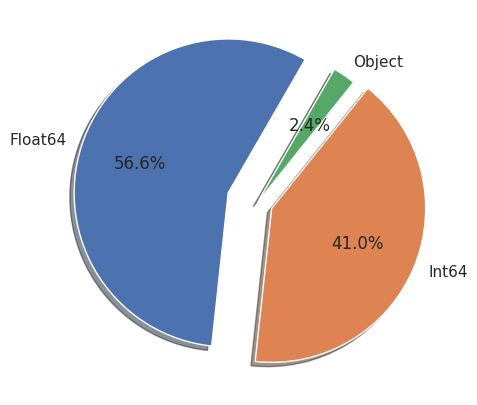

In [7]:
count_columns = np.array([len(float_columns), len(int_columns), len(obj_columns)])

mylabels = ["Float64", "Int64", "Object"]
myexplode = (0.2, 0.1, 0)

fig, ax = plt.subplots(figsize=(13, 5))

plt.pie(count_columns, 
        labels = mylabels, 
        autopct='%1.1f%%', 
        startangle = 60, 
        explode = myexplode, 
        shadow = True)
plt.show() 

## I. Descriptive Statistics. 

In [8]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
id.orig_p,123117.0,3.463926e+04,1.907062e+04,0.0,17702.000000,3.722100e+04,5.097100e+04,6.553500e+04
id.resp_p,123117.0,1.014305e+03,5.256372e+03,0.0,21.000000,2.100000e+01,2.100000e+01,6.538900e+04
flow_duration,123117.0,3.809566e+00,1.300054e+02,0.0,0.000001,4.000000e-06,5.000000e-06,2.172834e+04
fwd_pkts_tot,123117.0,2.268826e+00,2.233656e+01,0.0,1.000000,1.000000e+00,1.000000e+00,4.345000e+03
bwd_pkts_tot,123117.0,1.909509e+00,3.301831e+01,0.0,1.000000,1.000000e+00,1.000000e+00,1.011200e+04
fwd_data_pkts_tot,123117.0,1.471218e+00,1.963520e+01,0.0,1.000000,1.000000e+00,1.000000e+00,4.345000e+03
bwd_data_pkts_tot,123117.0,8.202604e-01,3.229395e+01,0.0,0.000000,0.000000e+00,0.000000e+00,1.010500e+04
fwd_pkts_per_sec,123117.0,3.518063e+05,3.707645e+05,0.0,74.543538,2.467238e+05,5.242880e+05,1.048576e+06
bwd_pkts_per_sec,123117.0,3.517620e+05,3.708015e+05,0.0,72.889275,2.467238e+05,5.242880e+05,1.048576e+06
flow_pkts_per_sec,123117.0,7.035683e+05,7.415634e+05,0.0,149.087077,4.934475e+05,1.048576e+06,2.097152e+06


## I. Pairplot KDE for float columns based on Target. 

In [9]:
# sns.pairplot(X[float_columns]);

## I. Pairplot KDE for numerical columns based on Target. 

In [10]:
# sns.pairplot(X[numerical_columns]);

## I. Correlation Plot.

In [11]:
X['Target'] = y


attack = {'DOS_SYN_Hping':0,
 'Thing_Speak':1,
 'ARP_poisioning':2,
 'MQTT_Publish':3,
 'NMAP_UDP_SCAN':4,
 'NMAP_XMAS_TREE_SCAN':5,
 'NMAP_OS_DETECTION':6,
 'NMAP_TCP_scan':7,
 'DDOS_Slowloris':8,
 'Wipro_bulb':9,
 'Metasploit_Brute_Force_SSH':10,
 'NMAP_FIN_SCAN':11}

X['Target'] = X['Target'].map(attack)
y['Attack_type'] = y['Attack_type'].map(attack)

In [12]:
X['service'].value_counts(ascending=False, normalize=True)

service
-         0.835474
dns       0.079217
mqtt      0.033562
http      0.028136
ssl       0.021630
ntp       0.000983
dhcp      0.000406
irc       0.000349
ssh       0.000227
radius    0.000016
Name: proportion, dtype: float64

In [13]:
X['proto'].value_counts(ascending=False, normalize=True)

proto
tcp     0.896927
udp     0.102610
icmp    0.000463
Name: proportion, dtype: float64

In [14]:
"""we need to LabelEncoder first the object columns before displaying the Pearson correlation Graph"""


proto = {'tcp':1, 'udp':2, 'icmp':3}
service = {
    'mqtt':1, 
    '-':0, 
    'http':2, 
    'dns':3, 
    'ntp':4, 
    'ssl':5,
    'dhcp':6, 
    'irc':7, 
    'ssh':8,
    'radius':9
}

X['service'] = X['service'].map(service)
X['proto'] = X['proto'].map(proto)

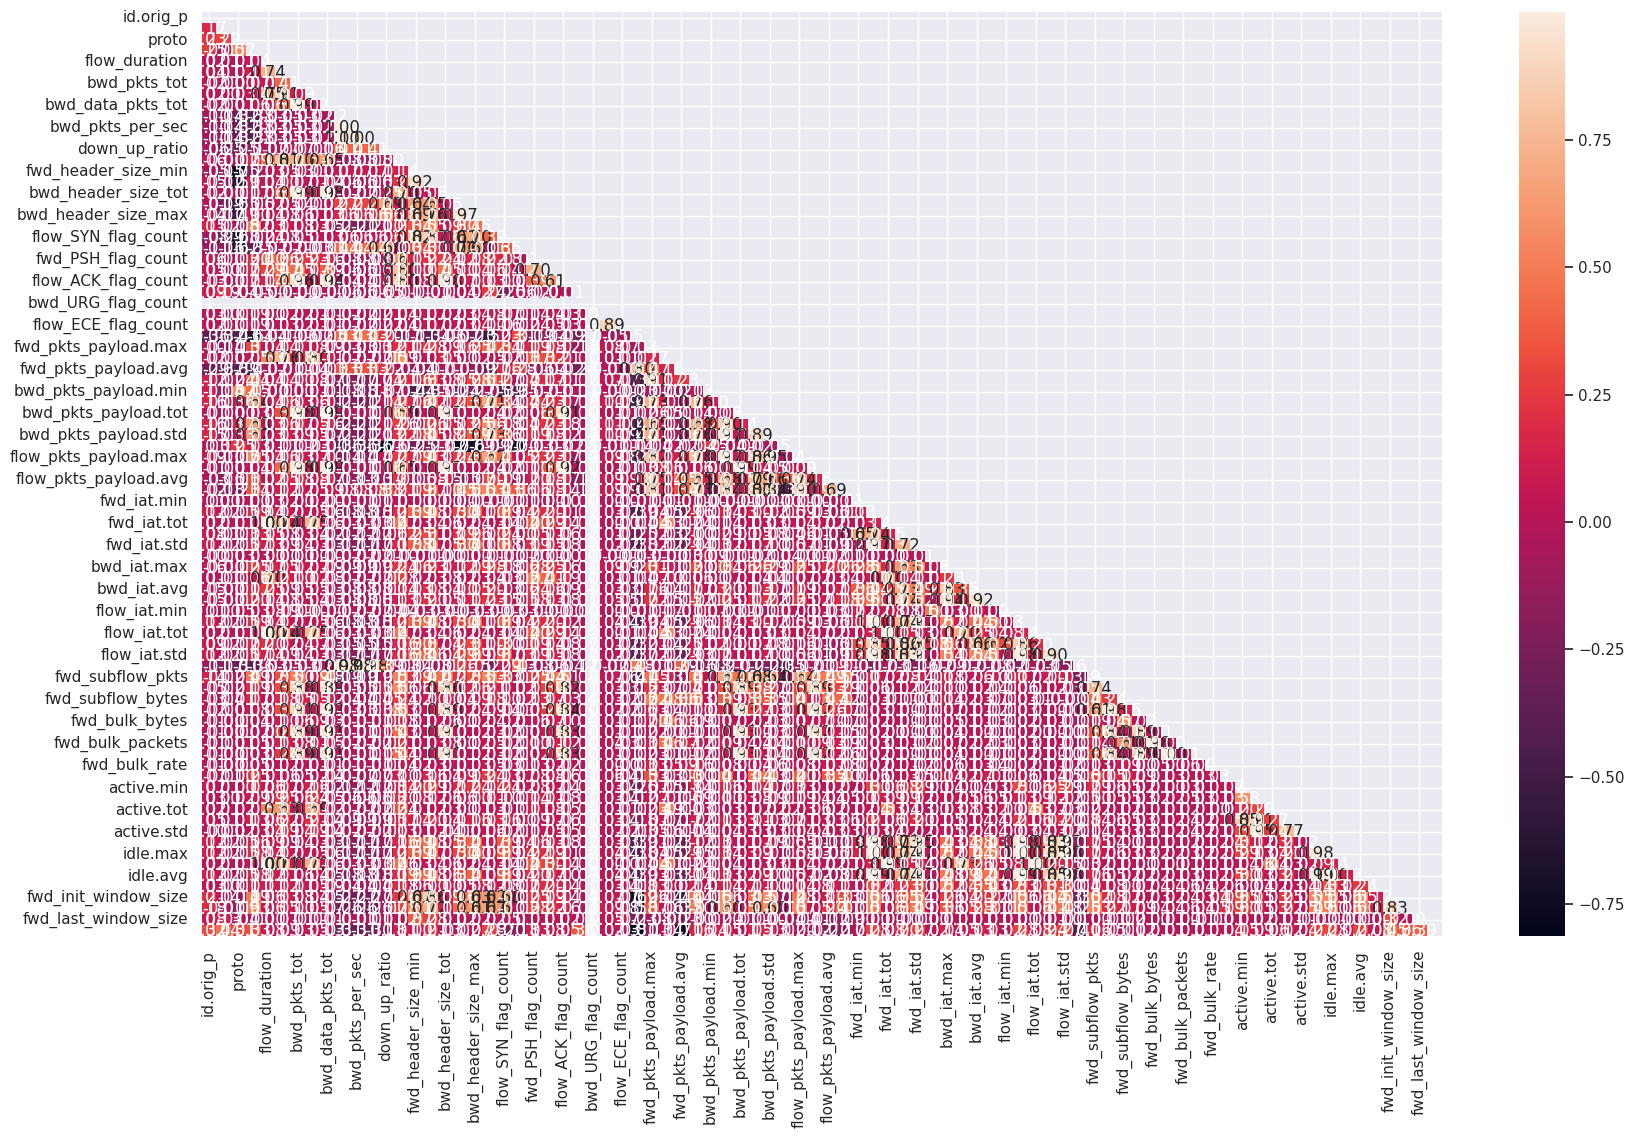

In [15]:
corr = X.corr()

mask = np.triu(corr)
fig, ax = plt.subplots(figsize=(20, 12))
ax = sns.heatmap(corr, mask=mask, fmt='.2f', annot=True);

## I. Most 20 correlated columns.

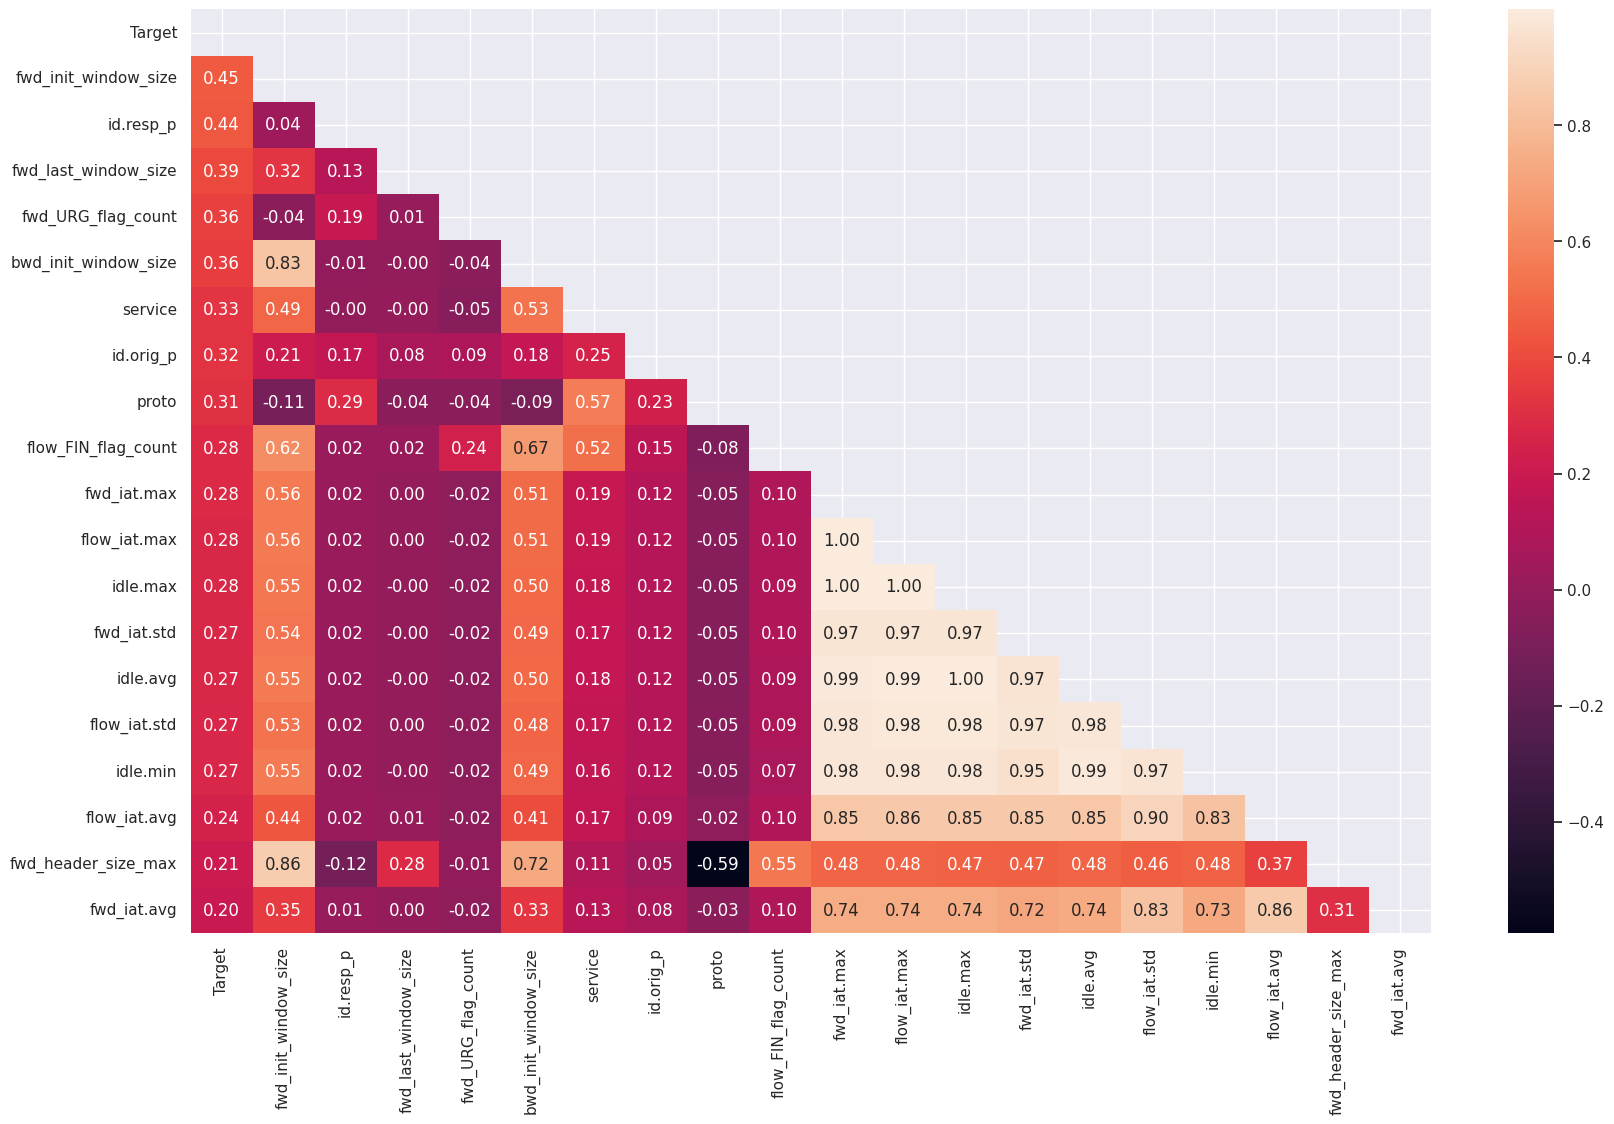

In [16]:
### Most correlated columns with Target
most_corr = list(corr.nlargest(20, 'Target')['Target'].index)

corr = X[most_corr].corr()

mask = np.triu(corr)
fig, ax = plt.subplots(figsize=(20, 12))
ax = sns.heatmap(corr, mask=mask, fmt='.2f', annot=True);

In [17]:
X.isnull().sum().sort_values(ascending=False)[0]/len(X)
# service is the most missing columns due to the fact that we replaced '-' with np.nan
"""Unique column missing is Service with: 0.8354 %"""

'Unique column missing is Service with: 0.8354 %'

## I. Packages.

In [18]:
#statistics
from scipy import stats
from scipy.stats import randint, mode

from sklearn.feature_selection import mutual_info_classif

#transformers and pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config

#algorithms
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression # Don't use it. (This is a multiclass classification problem)
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

# Model Evaluation
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import optuna
from optuna.samplers import TPESampler
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice

# Run time comparison
import time

# Random State
random_state = 42

## I. Data Preprocessing with ColumnTransformer and using Train Test Split. 

In [19]:
X = X.drop('Target', axis=1)

In [20]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=random_state)

In [21]:
print('X_train shape:', X_train.shape)
print('X_valid shape:', X_valid.shape)
print('y_train shape:', y_train.shape)
print('y_valid shape:', y_valid.shape)

X_train shape: (92337, 83)
X_valid shape: (30780, 83)
y_train shape: (92337, 1)
y_valid shape: (30780, 1)


In [22]:
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', MinMaxScaler(feature_range=(0, 1)), X.columns.to_list()),  
        ('pca', PCA(), X.columns.to_list())
    ])

model = XGBClassifier(random_state=random_state)

pipeline = Pipeline(steps=[
                        ('preprocessor', preprocessor),
                        ('model', model)
                             ])
 
pipeline.fit(X_train, y_train)
preds = pipeline.predict(X_valid)


score_report = classification_report(y_valid, preds)
print('\t\t\t  With XGBoostClassifier', sep='\n')
print(score_report)

			  With XGBoostClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23622
           1       0.99      0.99      0.99      2032
           2       0.99      0.99      0.99      1951
           3       1.00      1.00      1.00      1072
           4       0.99      0.98      0.99       626
           5       1.00      0.99      1.00       489
           6       1.00      1.00      1.00       509
           7       1.00      1.00      1.00       263
           8       0.99      0.98      0.99       132
           9       1.00      0.96      0.98        70
          10       1.00      0.67      0.80         9
          11       1.00      0.80      0.89         5

    accuracy                           1.00     30780
   macro avg       1.00      0.95      0.97     30780
weighted avg       1.00      1.00      1.00     30780



## I. Modeling with Stratified.

In [23]:
def cross_validation_scores(model, X, y, target, cv, n_splits):
    """ 
    StratifiedGroupKFold  is useful for situations where data is grouped and maintaining class balance across folds is important.
    """
    
    cv = StratifiedKFold(shuffle=True, random_state=random_state, n_splits=n_splits)
    # The groups parameter is used to ensure that all samples from the same group are kept together in the same fold.
    score = {}
    prediction_probas = []
    for fold, (train_index, valid_index) in enumerate(cv.split(X, y)):

        X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
        y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]

        # fit the model
        model.fit(X_train, y_train)

        # predict the model
        predictions = model.predict(X_valid)

        # calculate accuracy
        score_accuracy = accuracy_score(y_valid, predictions)

        # store for each fold the accuracy
        score[fold] = score_accuracy

        # predict_proba is a method used in classification models in scikit-learn to return the predicted probabilities for each class instead of just the class label.
        # Predict probabilities
        prediction_probas.append(model.predict_proba(X_valid)[:, 1])


    print(f'Score:{np.mean(list(score.values())):.4f} ± {np.std(list(score.values())):.2f}')
    return prediction_probas[0]    

In [24]:
%%time

algorithms = ['XGBClassifier', 'LGBMClassifier']
for index, model in enumerate([XGBClassifier(random_state=random_state),
              LGBMClassifier(random_state=random_state, verbose=-1)]):
    
    print(f'Model: {algorithms[index]}')
    print('='*80)
    print(cross_validation_scores(model, X, y, 'Target', cv=StratifiedKFold(shuffle=True, random_state=random_state), n_splits=10))

Model: XGBClassifier
Score:0.9986 ± 0.00
[7.9776883e-06 1.0189090e-05 9.5974265e-06 ... 1.9688985e-06 1.9689005e-06
 1.9689005e-06]
Model: LGBMClassifier
Score:0.7573 ± 0.09
[0. 0. 0. ... 0. 0. 0.]
CPU times: user 12min 4s, sys: 3.04 s, total: 12min 7s
Wall time: 3min 55s
